# Caso Práctico: Clasificación de imágenes

## 1. Conjunto de datos

In [1]:
from tensorflow.keras import datasets

In [2]:
fashion_mnist = datasets.fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## 2. Visualización del conjunto de datos

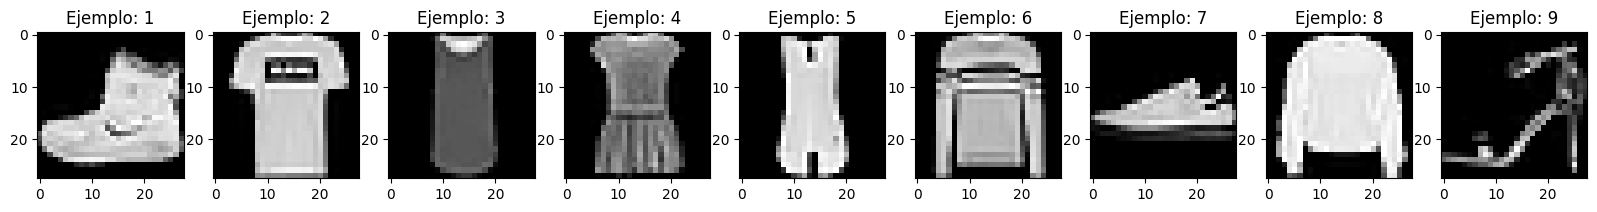

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for index, img in zip(range(1, 10), X_train[:9]):
    plt.subplot(1, 9, index)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

In [5]:
print("Longitud subconjunto de entrenamiento: ", len(X_train))
print("Longitud subconjunto de pruebas: ", len(X_test))

Longitud subconjunto de entrenamiento:  60000
Longitud subconjunto de pruebas:  10000


## 3. Transformación del conjunto de datos

In [6]:
X_train_prep = X_train.reshape((60000, 28*28))
X_test_prep = X_test.reshape((10000, 28*28))

In [7]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer()
X_train_prep = transformer.fit_transform(X_train_prep)
X_test_prep = transformer.transform(X_test_prep)

In [8]:
from tensorflow.keras.utils import to_categorical

y_train_prep = to_categorical(y_train)
y_test_prep = to_categorical(y_test)

## 4. Construcción del modelo

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(300, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [10]:
network.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy', 'Precision'])

In [11]:
history = network.fit(X_train_prep, 
                      y_train_prep,
                      batch_size=32,
                      epochs=15, 
                      validation_data=(X_test_prep, y_test_prep))

Epoch 1/15
1875/1875 [==============================] - 15s 7ms/step - loss: 0.5118 - accuracy: 0.8136 - precision: 0.8685 - val_loss: 0.4218 - val_accuracy: 0.8465 - val_precision: 0.8808
Epoch 2/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3683 - accuracy: 0.8649 - precision: 0.8915 - val_loss: 0.4308 - val_accuracy: 0.8432 - val_precision: 0.8674
Epoch 3/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3279 - accuracy: 0.8785 - precision: 0.9007 - val_loss: 0.3666 - val_accuracy: 0.8642 - val_precision: 0.8860
Epoch 4/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3027 - accuracy: 0.8869 - precision: 0.9061 - val_loss: 0.3377 - val_accuracy: 0.8766 - val_precision: 0.8970
Epoch 5/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2832 - accuracy: 0.8933 - precision: 0.9117 - val_loss: 0.3515 - val_accuracy: 0.8722 - val_precision: 0.8899
Epoch 6/15
1875/1875 [==============================] -